<a href="https://colab.research.google.com/github/vsrivatsan2096/iku/blob/master/Iku_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Trained embeddings# Semantics Similarity

In [66]:
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2019-03-14 16:46:29--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.169.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.169.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  36.8MB/s    in 44s     

2019-03-14 16:47:14 (35.9 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [1]:
!wget "http://nlp.stanford.edu/data/glove.840B.300d.zip"

--2019-03-14 16:15:50--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2019-03-14 16:15:50--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

glove.840B.300d.zip 100%[===================>]   2.03G  15.7MB/s    in 4m 4s   

2019-03-14 16:19:55 (8.51 MB/s) - ‘glove.840B.300d.zip’ saved [2176768927/2176768927]



In [0]:
import os
import zipfile

In [0]:
wiki_zip = zipfile.ZipFile('glove.840B.300d.zip')
wiki_zip.extractall()
os.remove("glove.840B.300d.zip")

In [0]:
!wget https://dl.fbaipublicfiles.com/infersent/infersent1.pkl

In [0]:
infersent_embeddings = 'infersent1.pkl'

In [0]:
google_embeddings = 'GoogleNews-vectors-negative300.bin.gz'

In [0]:
common_crawl_embeddings = 'glove.840B.300d.txt'

# Installing the Libraries

In [0]:
!pip install -U -q numpy
!pip install -U -q keras
!pip install -U -q scikit-learn
!pip install -U -q matplotlib
!pip install -U -q nltk
!pip install -U -q PyDrive 
!pip install -U -q pandas
!pip install -U -q https://download.pytorch.org/whl/cu100/torch-1.0.1-cp36-cp36m-win_amd64.whl
!pip install -U -q torchvision
!pip install --quiet tensorflow-hub
!pip install --quiet seaborn
!pip install --quiet "tensorflow>=1.7"

# Google Drive

In [6]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import json

    100% |████████████████████████████████| 993kB 14.4MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_ids = ["1bqdQccb6176JhXU7CZbWnv3vTAi7BH_-"]
file_names = ['questions.csv']

In [0]:
for each_id, each_name in zip(file_ids, file_names):
    download = drive.CreateFile({'id':each_id})
    download.GetContentFile(each_name)

# Mount Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Cloning Github

In [0]:
!git clone https://github.com/vsrivatsan2096/iku.git

# Dataset

In [0]:
import numpy as np
import pandas as pd
import multiprocessing

In [0]:
questions = pd.read_csv("questions.csv")
questions.dropna(inplace=True)

In [0]:
questions1 = questions.iloc[:, 3].values
questions2 = questions.iloc[:, 4].values
is_duplicate_questions = questions.iloc[:, 5].values

In [13]:
questions.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
cores = multiprocessing.cpu_count()

In [0]:
length = is_duplicate_questions.shape[0]

# Scores

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import jaccard_similarity_score
from sklearn.neighbors import DistanceMetric

In [0]:
def cosine_similarity(self, sentence1, sentence2):
    return cosine_similarity(sentence1.reshape(1, -1), sentence2.reshape(1, -1))

In [0]:
def manhattan_distances(self, sentence1, sentence2):
    return manhattan_distances(sentence1.reshape(1, -1), sentence2.reshape(1, -1))

In [0]:
def euclidean_distances(self, sentence1, sentence2):
    return euclidean_distances(sentence1.reshape(1, -1), sentence2.reshape(1, -1))

In [0]:
def jaccard_similarity(self, sentence1, sentence2):
    jac_score = 0
    try:
        jac_score = jaccard_similarity_score(sentence1.reshape(1, -1), sentence2.reshape(1, -1))
    finally:
        return jac_score

In [0]:
def minkowski_distances(self, sentence1, sentence2):
    minkowski_distance = DistanceMetric.get_metric('minkowski')
    return minkowski_distance.pairwise(sentence1.reshape(1, -1), sentence2.reshape(1, -1))

In [0]:
def get_scores(self, sentences1, sentences2, length):
    scores = []
    for each in range(length):
        each_score = []
        each_score.append(self.cosine_similarity(sentences1[each], sentences2[each])[0][0])
        each_score.append(self.manhattan_distances(sentences1[each], sentences2[each])[0][0])
        each_score.append(self.euclidean_distances(ssentences1[each], sentences2[each])[0][0])
        #each_score.append(self.jaccard_similarity(self.sentences1[each], self.sentences2[each]))
        each_score.append(self.minkowski_distances(sentences1[each], sentences2[each])[0][0])
        scores[each] = np.asarray(each_score)
    return scores

# Natural Language Processing

In [0]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
lemma = WordNetLemmatizer()
stopword = stopwords.words("english")

In [0]:
sentences_1 = []
for i in questions1:
    tempx = re.sub(r"[^A-Za-z]", " ", str(i))
    tempx = tempx.lower().split()
    tempx = [word for word in tempx if word not in stopword]
    tempx = [lemma.lemmatize(word, pos="a") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="r") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="n") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="v") for word in tempx]
    sentences_1.append(" ".join(tempx))
sentences_1 = np.asarray(sentences_1)

In [0]:
sentences_2 = []
for i in questions2:
    tempx = re.sub(r"[^A-Za-z]", " ", str(i))
    tempx = tempx.lower().split()
    tempx = [word for word in tempx if word not in stopword]
    tempx = [lemma.lemmatize(word, pos="a") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="r") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="n") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="v") for word in tempx]
    sentences_2.append(" ".join(tempx))
sentences_2 = np.asarray(sentences_2)

# LSA Method

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)

In [0]:
svd_model = TruncatedSVD(n_components=300,
                         algorithm='randomized',
                         n_iter=10, random_state=42)

In [0]:
lsa_model1 = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])

In [0]:
lsa_model2 = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])

In [0]:
lsa_1 = lsa_model1.fit_transform(sentences_1)
lsa_2 = lsa_model2.fit_transform(sentences_2)

In [0]:
distance_and_similarity_scores_3 = []

In [0]:
for i in range(0, 20):
    temp = {}
    temp['cosine_similarity'] = cosine_similarity(np.asarray([lsa_1[i]]), np.asarray([lsa_2[i]]))[0][0]
    temp['manhattan_distance'] = euclidean_distances(np.asarray([lsa_1[i]]), np.asarray([lsa_2[i]]))[0][0]
    temp['euclidean_distance'] = manhattan_distances(np.asarray([lsa_1[i]]), np.asarray([lsa_2[i]]))[0][0]
    distance_and_similarity_scores_3.append(temp)

In [0]:
for i in range(0, 20):
    print(is_duplicate_questions[i], distance_and_similarity_scores_3[i])

# Word2Vec model(Using Mean to get the sentence vectors)

In [0]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

In [0]:
google_model = KeyedVectors.load_word2vec_format("E:\Models\pre_trained\word2vec\google\google.300d.bin", binary=True)
#wiki_model = KeyedVectors.load_word2vec_format("models/pretrained/glove/wiki/wiki.300d.txt", binary=False)
#common_crawl_model = KeyedVectors.load_word2vec_format("models/pretrained/glove/common_crawl/common_crawl.300d.txt", binary=False)

In [0]:
def sentence_vectorizer(model, sentence):
    vectors =[]
    num = 0
    for i in sentence.split():
        try:
            if num == 0:
                vectors = model[i]
            else:
                vectors = np.add(vectors, model[i])
            num += 1
        except:
            pass
    return np.array(vectors) / num

In [0]:
sent_vec1 = []
for each in sentences_1:
    temp = sentence_vectorizer(google_model, each)
    if temp.shape[0] != 0:
        sent_vec1.append(temp)
    else:
        sent_vec1.append(np.zeros((300,)))
sent_vec1 = np.asarray(sent_vec1)

In [0]:
sent_vec2 = []
for each in sentences_2:
    temp = sentence_vectorizer(google_model, each)
    if temp.shape[0] != 0:
        sent_vec2.append(temp)
    else:
        sent_vec2.append(np.zeros((300,)))
sent_vec2 = np.asarray(sent_vec2)

In [0]:
distance_and_similarity_scores_4 = []

In [0]:
for i in range(0, 20):
    temp = {}
    temp['cosine_similarity'] = cosine_similarity(np.asarray([sent_vec1[i]]), np.asarray([sent_vec2[i]]))[0][0]
    temp['manhattan_distance'] = euclidean_distances(np.asarray([sent_vec1[i]]), np.asarray([sent_vec2[i]]))[0][0]
    temp['euclidean_distance'] = manhattan_distances(np.asarray([sent_vec1[i]]), np.asarray([sent_vec2[i]]))[0][0]
    distance_and_similarity_scores_4.append(temp)

In [0]:
for i in range(0, 20):
    print(is_duplicate_questions[i], distance_and_similarity_scores_4[i])

# InferText model

https://github.com/facebookresearch/InferSent

In [0]:
import torch
import numpy as np
from random import randint

**Load Model**

In [0]:
from models.infersent.models import InferSent
model_version = 1
MODEL_PATH = "models\infersent\infersent%s.pickle" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

In [0]:
use_cuda = False
model = model.cuda() if use_cuda else model # Keep it on CPU or put it on GPU

In [0]:
W2V_PATH = 'E:\Models\pre_trained\glove\commoncrawl\common_crawl.300d.txt'
model.set_w2v_path(W2V_PATH)

In [0]:
model.build_vocab_k_words(K=100000)

Vocab size : 100000


**Encode Sentences**

In [0]:
embeddings_1.shape

(20, 4096)

In [0]:
embeddings_1 = model.encode(sentences_1[:20], bsize=128, tokenize=False, verbose=True)

Nb words kept : 139/152 (91.4%)
Speed : 25.0 sentences/s (cpu mode, bsize=128)


In [0]:
embeddings_2 = model.encode(sentences_2[:20], bsize=128, tokenize=False, verbose=True)

Nb words kept : 140/150 (93.3%)
Speed : 35.7 sentences/s (cpu mode, bsize=128)


In [0]:
distance_and_similarity_scores_6 = []

In [0]:
for i in range(0, 20):
    temp = {}
    temp['cosine_similarity'] = cosine_similarity(np.asarray([embeddings_1[i]]), np.asarray([embeddings_2[i]]))[0][0]
    temp['manhattan_distance'] = euclidean_distances(np.asarray([embeddings_1[i]]), np.asarray([embeddings_2[i]]))[0][0]
    temp['euclidean_distance'] = manhattan_distances(np.asarray([embeddings_1[i]]), np.asarray([embeddings_2[i]]))[0][0]
    distance_and_similarity_scores_6.append(temp)

In [0]:
for i in range(0, 20):
    print(is_duplicate_questions[i], distance_and_similarity_scores_6[i])

0 {'cosine_similarity': 0.9458276, 'manhattan_distance': 1.2538241, 'euclidean_distance': 32.184387501109086}
0 {'cosine_similarity': 0.6067528, 'manhattan_distance': 2.9255688, 'euclidean_distance': 112.79561321428446}
0 {'cosine_similarity': 0.8873254, 'manhattan_distance': 1.8598092, 'euclidean_distance': 72.58798747658739}
0 {'cosine_similarity': 0.5393939, 'manhattan_distance': 3.1896555, 'euclidean_distance': 120.62491884012707}
0 {'cosine_similarity': 0.75635266, 'manhattan_distance': 3.1802003, 'euclidean_distance': 131.53287864351518}
1 {'cosine_similarity': 0.8199016, 'manhattan_distance': 2.2952108, 'euclidean_distance': 86.52014614462496}
0 {'cosine_similarity': 0.3553719, 'manhattan_distance': 3.3347626, 'euclidean_distance': 130.02840969695353}
1 {'cosine_similarity': 0.96099097, 'manhattan_distance': 0.75167567, 'euclidean_distance': 19.646674617991266}
0 {'cosine_similarity': 1.0, 'manhattan_distance': 0.0, 'euclidean_distance': 1.2594475265359506e-05}
0 {'cosine_simila

**Sentence Encoder V2**

https://tfhub.dev/google/universal-sentence-encoder/2

In [0]:
!pip3 install --quiet tensorflow-hub

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [0]:
import tensorflow as tf
import tensorflow_hub as hub

W0310 12:42:12.050889  7768 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [0]:
embed = hub.Module(module_url)

In [0]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    sentences_embeddings_1 = session.run(embed(sentences_1))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0310 13:10:26.869572  7768 tf_logging.py:115] Saver not created because there are no variables in the graph to restore


In [0]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    sentences_embeddings_2 = session.run(embed(sentences_2))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0310 13:10:56.016236  7768 tf_logging.py:115] Saver not created because there are no variables in the graph to restore


In [0]:
distance_and_similarity_scores_8 = []

0 {'cosine_similarity': 0.9486568, 'manhattan_distance': 0.3204472, 'euclidean_distance': 5.245485807812656}
0 {'cosine_similarity': 0.6202224, 'manhattan_distance': 0.8715247, 'euclidean_distance': 14.994461547388255}
0 {'cosine_similarity': 0.8335015, 'manhattan_distance': 0.57705903, 'euclidean_distance': 9.815707650494005}
0 {'cosine_similarity': 0.2900136, 'manhattan_distance': 1.1916263, 'euclidean_distance': 21.74811126565328}
0 {'cosine_similarity': 0.49464017, 'manhattan_distance': 1.0053457, 'euclidean_distance': 17.698465278358526}
1 {'cosine_similarity': 0.8778694, 'manhattan_distance': 0.49422783, 'euclidean_distance': 7.790173144967412}
0 {'cosine_similarity': 0.16489124, 'manhattan_distance': 1.2923691, 'euclidean_distance': 23.196336368258926}
1 {'cosine_similarity': 0.9448141, 'manhattan_distance': 0.33222255, 'euclidean_distance': 5.783593213651329}
0 {'cosine_similarity': 1.0, 'manhattan_distance': 0.0, 'euclidean_distance': 0.0}
0 {'cosine_similarity': 0.83476865, '

# CNN and TimeDistributed

https://www.kaggle.com/zhihang/an-ensemble-approach-cnn-and-timedistributed

In [0]:
import numpy as np
import pandas as pd

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [0]:
import re
import matplotlib.pyplot as plt
import datetime, time, json
from string import punctuation

In [0]:
from collections import defaultdict
from sklearn.metrics import accuracy_score

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
from keras import initializers
from keras import backend as K
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Reshape, BatchNormalization, TimeDistributed, Lambda, Activation, LSTM, Flatten, Convolution1D, GRU, MaxPooling1D
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

In [0]:
all_questions = sentences_1.tolist() + sentences_2.tolist()

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_questions)

In [0]:
question1_word_sequences = tokenizer.texts_to_sequences(sentences_1.tolist())
question2_word_sequences = tokenizer.texts_to_sequences(sentences_2.tolist())

In [0]:
word_index = tokenizer.word_index

In [31]:
max_question_len = 0
for each in range(length):
    max_question_len = max(max_question_len, len(question1_word_sequences[each]), len(question2_word_sequences[each]))
print(max_question_len)

97


In [0]:
train_q1 = pad_sequences(question1_word_sequences,
                              maxlen = max_question_len)

In [0]:
train_q2 = pad_sequences(question2_word_sequences,
                              maxlen = max_question_len)

In [34]:
embeddings_index = {}
with open(common_crawl_embeddings, encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding
print('Word embeddings:', len(embeddings_index))

Word embeddings: 2196016


In [0]:
embedding_dim = 300

In [36]:
nb_words = len(word_index)
word_embedding_matrix = np.zeros((nb_words + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        word_embedding_matrix[i] = embedding_vector

print('Null word embeddings: %d' % np.sum(np.sum(word_embedding_matrix, axis=1) == 0)) #75,334

Null word embeddings: 16082


In [0]:
units = 128 # Number of nodes in the Dense layers
dropout = 0.25 # Percentage of nodes to drop
nb_filter = 32 # Number of filters to use in Convolution1D
filter_length = 3 # Length of filter for Convolution1D

In [0]:
weights = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2)
bias = bias_initializer='zeros'

In [0]:
from keras.layers import Input

In [40]:
model_1_input = Input(shape = (max_question_len,), dtype = 'int32', name = 'model_1_input')
model_1_embedding = Embedding(nb_words + 1,
                     embedding_dim,
                     weights = [word_embedding_matrix], 
                     input_length = max_question_len,
                     trainable = False)(model_1_input)
model_1_conv_a = Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same')(model_1_embedding)
model_1_batch_a = BatchNormalization()(model_1_conv_a)
model_1_act = Activation('relu')(model_1_batch_a)
model_1_drop_a = Dropout(dropout)(model_1_act)
model_1_conv_b = Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same')(model_1_drop_a)
model_1_batch_b = BatchNormalization()(model_1_conv_b)
model_1_act_b = Activation('relu')(model_1_batch_b)
model_1_drop_b = Dropout(dropout)(model_1_act_b)
model_1_flat = Flatten()(model_1_drop_b)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model_2_input = Input(shape = (max_question_len,), dtype = 'int32', name = 'model_2_input')
model_2_embedding = Embedding(nb_words + 1,
                     embedding_dim,
                     weights = [word_embedding_matrix], 
                     input_length = max_question_len,
                     trainable = False)(model_2_input)
model_2_conv_a = Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same')(model_2_embedding)
model_2_batch_a = BatchNormalization()(model_2_conv_a)
model_2_act = Activation('relu')(model_2_batch_a)
model_2_drop_a = Dropout(dropout)(model_2_act)
model_2_conv_b = Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same')(model_2_drop_a)
model_2_batch_b = BatchNormalization()(model_2_conv_b)
model_2_act_b = Activation('relu')(model_2_batch_b)
model_2_drop_b = Dropout(dropout)(model_2_act_b)
model_2_flat = Flatten()(model_2_drop_b)

In [0]:
model_3_input = Input(shape = (max_question_len,), dtype = 'int32', name = 'model_3_input')
model_3_embedding = Embedding(nb_words + 1,
                     embedding_dim,
                     weights = [word_embedding_matrix],
                     input_length = max_question_len,
                     trainable = False)(model_3_input)
model_3_time_distributed = TimeDistributed(Dense(embedding_dim))(model_3_embedding)
model_3_batch = BatchNormalization()(model_3_time_distributed)
model_3_act = Activation('relu')(model_3_batch)
model_3_drop = Dropout(dropout)(model_3_act)
model_3_lambda = Lambda(lambda x: K.max(x, axis=1), output_shape=(embedding_dim, ))(model_3_drop)

In [0]:
model_4_input = Input(shape = (max_question_len,), dtype = 'int32', name = 'model_4_input')
model_4_embedding = Embedding(nb_words + 1,
                     embedding_dim,
                     weights = [word_embedding_matrix],
                     input_length = max_question_len,
                     trainable = False)(model_4_input)
model_4_time_distributed = TimeDistributed(Dense(embedding_dim))(model_4_embedding)
model_4_batch = BatchNormalization()(model_4_time_distributed)
model_4_act = Activation('relu')(model_4_batch)
model_4_drop = Dropout(dropout)(model_4_act)
model_4_lambda = Lambda(lambda x: K.max(x, axis=1), output_shape=(embedding_dim, ))(model_4_drop)

In [0]:
from keras.layers import concatenate

In [0]:
merge_layer = concatenate([model_1_flat, model_2_flat, model_3_lambda, model_4_lambda], name = 'merge_layer')

In [0]:
t = Dense(200, activation = 'relu', name = 'dense1')(merge_layer)
t = Dropout(0.3)(t)
t = BatchNormalization()(t)

In [0]:
t = Dense(200, activation = 'relu', name  ='dense2')(t)
t = Dropout(0.3)(t)
t = BatchNormalization()(t)

In [0]:
t = Dense(100, activation= 'relu',name = 'dense3')(t)
t = Dropout(0.3)(t)
t = BatchNormalization()(t)

In [0]:
final_output = Dense(1, activation = 'sigmoid')(t)

In [0]:
from keras.models import Model

In [0]:
model = Model(inputs = [model_1_input, model_2_input, model_3_input, model_4_input], outputs = final_output)

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
save_best_weights = 'question_pairs_weights.h5'

In [54]:
t0 = time.time()
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')]
history = model.fit([train_q1, train_q2, train_q1, train_q2],
                    questions.is_duplicate,
                    batch_size=256,
                    epochs=1, #Use 100, I reduce it for Kaggle,
                    validation_split=0.15,
                    verbose=True,
                    shuffle=True,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 343695 samples, validate on 60653 samples
Epoch 1/1
343695/343695 [==============================] - 126s 367us/step - loss: 0.5500 - acc: 0.7156 - val_loss: 0.4895 - val_acc: 0.7565
Minutes elapsed: 2.223541


In [0]:
summary_stats = pd.DataFrame({'epoch': [ i + 1 for i in history.epoch ],
                              'train_acc': history.history['acc'],
                              'valid_acc': history.history['val_acc'],
                              'train_loss': history.history['loss'],
                              'valid_loss': history.history['val_loss']})

In [56]:
summary_stats

,epoch,train_acc,train_loss,valid_acc,valid_loss
0,1,0.71562,0.550006,0.756517,0.489547


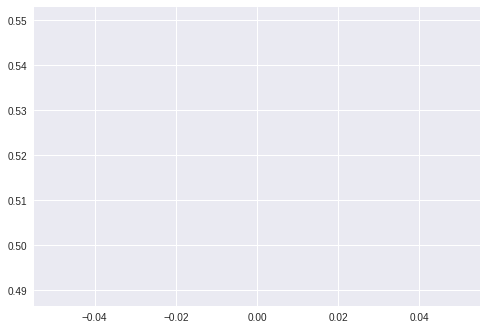

In [57]:
plt.plot(summary_stats.train_loss) # blue
plt.plot(summary_stats.valid_loss) # green
plt.show()

In [58]:
min_loss, idx = min((loss, idx) for (idx, loss) in enumerate(history.history['val_loss']))
print('Minimum loss at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(min_loss))
min_loss = round(min_loss, 4)

Minimum loss at epoch 1 = 0.4895


In [0]:
model.load_weights(save_best_weights)
predictions = model.predict([test_q1, test_q2, test_q1, test_q2], verbose = True)

In [0]:
del embeddings_index
del embedding

In [0]:
del model

In [0]:
del train_q1
del train_q2

In [0]:
del word_embedding_matrix

In [0]:
del question1_word_sequences
del question2_word_sequences
del all_questions

**Siamese Neural Networks(Using LSTM and GRU)**

https://medium.com/mlreview/implementing-malstm-on-kaggles-quora-question-pairs-competition-8b31b0b16a07

In [0]:
from keras.models import Model
import keras.backend as backend
from keras.layers import Input, Embedding, LSTM, Lambda, GRU, Dropout

In [0]:
vocabulary = dict()
inverse_vocabulary = ['<unk>']

In [0]:
q2n_left = []
for sentence in sentences_1.tolist():
    temp_sentence = []
    for word in sentence.split():
        if word not in vocabulary:
            vocabulary[word] = len(inverse_vocabulary)
            temp_sentence.append(len(inverse_vocabulary))
            inverse_vocabulary.append(word)
        else:
            temp_sentence.append(vocabulary[word])
    q2n_left.append(temp_sentence)

In [0]:
q2n_right = []
for sentence in sentences_2.tolist():
    temp_sentence = []
    for word in sentence.split():
        if word not in vocabulary:
            vocabulary[word] = len(inverse_vocabulary)
            temp_sentence.append(len(inverse_vocabulary))
            inverse_vocabulary.append(word)
        else:
            temp_sentence.append(vocabulary[word])
    q2n_right.append(temp_sentence)

In [0]:
embedding_dim = 300
embeddings = np.zeros((len(vocabulary) + 1, embedding_dim))
embeddings[0] = 0

In [0]:
from gensim.models.keyedvectors import KeyedVectors

In [0]:
google_model = KeyedVectors.load_word2vec_format(google_embeddings, binary=True)

In [0]:
for word, index in vocabulary.items():
    if word in google_model.vocab:
        embeddings[index] = google_model.word_vec(word)

In [0]:
del google_model

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
dataset_left = q2n_left

In [0]:
dataset_right = q2n_right

In [79]:
max_seq_length = 0
for each in range(length):
    max_seq_length = max(max_seq_length, len(q2n_left[each]), len(q2n_right[each]))
print(max_seq_length)

97


In [0]:
dataset_left = pad_sequences(q2n_left, maxlen=max_seq_length)
dataset_right = pad_sequences(q2n_right, maxlen=max_seq_length)

In [81]:
dataset_left.shape == dataset_right.shape

True

In [0]:
n_hidden1 = 512
n_hidden2 = 384
n_hidden3 = 256
n_hidden4 = 128

In [0]:
left_input = Input(shape=(max_seq_length, ), dtype='int32')
right_input = Input(shape=(max_seq_length, ), dtype='int32')

In [0]:
embedding_layer = Embedding(len(embeddings), embedding_dim, weights=[embeddings], 
                            input_length=max_seq_length, trainable=False)

In [0]:
encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)

In [0]:
shared_lstm1 = LSTM(n_hidden1, return_sequences=True)
shared_dropout1 = Dropout(0.3)
shared_gru1 = GRU(n_hidden2, return_sequences=True)
shared_dropout2 = Dropout(0.4)
shared_gru2 = GRU(n_hidden3, return_sequences=True)
shared_dropout3 = Dropout(0.3)
shared_lstm2 = LSTM(n_hidden4, return_sequences=False)

In [0]:
left_lstm1 = shared_lstm1(encoded_left)
left_dropout1 = shared_dropout1(left_lstm1)
left_gru1 = shared_gru1(left_dropout1)
left_dropout2 = shared_dropout2(left_gru1)
left_gru2 = shared_gru2(left_dropout2)
left_dropout3 = shared_dropout3(left_gru2)
left_lstm2 = shared_lstm2(left_dropout3)

In [0]:
right_lstm1 = shared_lstm1(encoded_right)
right_dropout1 = shared_dropout1(right_lstm1)
right_gru1 = shared_gru1(right_dropout1)
right_dropout2 = shared_dropout2(right_gru1)
right_gru2 = shared_gru2(right_dropout2)
right_dropout3 = shared_dropout3(right_gru2)
right_lstm2 = shared_lstm2(right_dropout3)

In [0]:
manhattan_distance_for_lstm = Lambda(function=lambda x: backend.exp(-backend.sum(backend.abs(x[0]-x[1]), axis=1, keepdims=True)),
                                     output_shape=lambda x: (x[0][0], 1))([left_lstm2, right_lstm2])

In [91]:
siamese_network = Model([left_input, right_input], manhattan_distance_for_lstm)
siamese_network.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])
siamese_network.fit([dataset_left, dataset_right], is_duplicate_questions, batch_size=256, 
                        epochs=1)

Epoch 1/1
404348/404348 [==============================] - 3060s 8ms/step - loss: 0.1753 - acc: 0.7357


In [0]:
siamese_network.save_weights("siamese_network_quora_len_97.h5")

In [93]:
from google.colab import files
files.download('siamese_network_quora_len_97.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 52056, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
import h5py

In [0]:
h5file = h5py.File('siamese_network_quora_len_97.h5')

In [0]:
json = siamese_network.to_json()

In [0]:
with open("siamese_network_quora_len_97.json", "w") as json_file:
    json_file.write(json)

In [100]:
uploaded = drive.CreateFile({'title': 'siamese_network_quora_len_97.json'})
uploaded.SetContentString(h5file)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

AttributeError: ignored